# Results

In [1]:
from os import makedirs
from os.path import join

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from matplotlib.legend import Legend


plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{cmbright}',
    'text.usetex': True,
    'font.family': 'serif',
})
color_palette = sns.color_palette('deep')
plt.rc('grid', linestyle="dotted", color='lightgrey')

results_dir = '../rpaper'
plots_dir = 'paper_plots'

arch_name = {
    'convnext-atto': 'Convnext-Atto',
    'convnext-tiny': 'ConvNext-Tiny',
    'convnextv2-atto': 'Convnextv2-Atto',
    'convnextv2-nano': 'Convnextv2-Nano',
    'convnextv2-tiny': 'Convnextv2-Tiny',
    'densenet121': 'DenseNet-121',
    'densenet161': 'DenseNet-161',
    'mobilenetv3-small-075': 'MobileNetV3-Small-0.75',
    'mobilenetv3-large-100': 'MobileNetV3-Large-1.0',
    'mobilevitv2-050': 'MobileViTV2-0.5',
    'mobilevitv2-100': 'MobileViTV2-1.0',
    'mobilevitv2-200': 'MobileViTV2-2.0',

}

def format_pm(s: str) -> str:
    if isinstance(s, str) and '±' in s:
        return s.replace('±', '$\\pm$')
    else:
        return s

makedirs(plots_dir, exist_ok=True)

### Task Complexity

In [2]:
def load_task_complexity_df():
    path = join(results_dir, 'task_compĺexity', 'exp_mtst.csv')
    df = pd.read_csv(path)

    df[['method', 'n-way', 'n-unseen', 'k-shot']] = df['run'].str.split('_', expand=True)
    df['n-way'] = df['n-way'].str[5:].astype(int)
    df['n-unseen'] = df['n-unseen'].str[7:].astype(int)
    df['k-shot'] = df['k-shot'].str[6:].astype(int)
    # df['BatchBased'] = df['BatchBased_HM']
    # df['ProtoNet'] = df['ProtoNet_HM']
    # df['HM'] = df['hm']

    # df = df[['n-way', 'n-unseen', 'k-shot', 'BatchBased', 'ProtoNet']]
    df = df[['method', 'n-way', 'n-unseen', 'k-shot'] + df.columns.tolist()[1:-4]]
    return df

task_complexity_df = load_task_complexity_df()
task_complexity_df

,method,n-way,n-unseen,k-shot,seen,unseen,hm,effusion,lung_opacity,atelectasis,infiltration,nodule,mass,pleural_thickening,cardiomegaly,edema,pneumothorax,consolidation,pneumonia
0,batchbased,3,1,1,77.42±0.22,68.15±0.41,70.32±0.31,71.35±0.58,83.71±0.37,65.13±0.55,80.11±0.56,80.42±0.54,82.87±0.48,82.44±0.49,62.11±0.89,78.19±0.83,68.51±1.00,70.14±0.84,61.95±0.82
1,batchbased,3,1,5,83.45±0.14,72.41±0.40,75.63±0.29,81.21±0.30,84.98±0.27,70.84±0.37,85.97±0.32,84.96±0.35,86.65±0.31,87.10±0.30,64.01±0.91,83.94±0.70,72.31±1.01,75.91±0.79,66.08±0.78
2,batchbased,3,1,15,85.08±0.12,78.60±0.36,80.28±0.26,83.51±0.21,84.41±0.24,73.69±0.30,88.33±0.26,87.18±0.30,88.23±0.28,87.76±0.31,70.06±0.86,90.37±0.46,78.59±0.91,82.74±0.68,73.28±0.65
3,batchbased,3,1,30,85.33±0.12,82.13±0.32,82.57±0.23,84.04±0.20,83.71±0.25,74.09±0.28,89.48±0.23,87.91±0.26,87.58±0.38,88.00±0.28,74.73±0.81,93.00±0.41,82.93±0.71,85.60±0.50,77.31±0.65
4,batchbased,3,2,1,80.26±0.30,60.70±0.20,67.89±0.20,74.74±0.72,72.64±0.66,61.31±0.61,86.13±0.66,87.76±0.48,90.29±0.47,89.09±0.40,55.39±0.35,70.89±0.46,59.23±0.38,60.83±0.39,57.03±0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,protonet,5,4,30,85.15±0.16,63.94±0.09,72.68±0.07,82.92±0.23,78.87±0.19,70.52±0.28,89.93±0.16,89.85±0.15,92.99±0.12,90.96±0.13,61.30±0.14,75.77±0.12,58.50±0.16,63.82±0.17,57.22±0.17
92,protonet,5,5,1,NaN,59.34±0.07,59.34±0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.08±0.16,69.30±0.17,55.14±0.14,59.64±0.17,55.06±0.16
93,protonet,5,5,5,NaN,62.59±0.05,62.59±0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.76±0.13,73.39±0.10,57.36±0.12,63.65±0.12,57.01±0.13
94,protonet,5,5,15,NaN,63.52±0.04,63.52±0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.40±0.12,74.33±0.09,57.88±0.11,64.58±0.11,57.12±0.12


#### BatchBased vs ProtoNet

In [3]:
def generate_latex_table(df: pd.DataFrame):
    df = df[['method', 'n-way', 'n-unseen', 'k-shot', 'hm']]
    dfs = []
    for method, method_df in df.groupby('method'):
        method = {'batchbased': 'BatchBased', 'protonet': 'ProtoNet'}[method]
        for n_way, method_n_way_df in method_df.groupby('n-way'):
            method_n_way_df= method_n_way_df.drop(columns=['method', 'n-way'])
            method_n_way_df = method_n_way_df.rename(columns={'hm': f'{method}{n_way}'})
            method_n_way_df= method_n_way_df.set_index(['n-unseen', 'k-shot'])
            dfs.append(method_n_way_df)


    df = pd.concat(dfs, axis=1)
    cols = ['BatchBased3', 'ProtoNet3', 'BatchBased4', 'ProtoNet4', 'BatchBased5', 'ProtoNet5']
    df = df[cols]

    def format_pm(x):
        if isinstance(x, str):
            return x.replace('±', '$\\pm$') if '±' in x else x
        else:
            return x
    formatters = [format_pm] * df.shape[1]
    path = join(results_dir, 'task_compĺexity', 'bb_vs_pn.tex')
    with open(path, 'w') as f:
        f.write(df.to_latex( formatters=formatters, na_rep=' '*12))
    return df


method_n_way_df = generate_latex_table(task_complexity_df)
method_n_way_df

BatchBased3   ProtoNet3 BatchBased4   ProtoNet4 BatchBased5  \
n-unseen k-shot                                                               
1        1       70.32±0.31  73.28±0.21  70.61±0.27  73.44±0.17  71.42±0.24   
         5       75.63±0.29  79.13±0.18  79.23±0.20  79.38±0.13  81.41±0.15   
         15      80.28±0.26  80.51±0.19  83.61±0.14  81.06±0.12  84.71±0.10   
         30      82.57±0.23  80.47±0.20  84.66±0.12  81.06±0.12  85.34±0.08   
2        1       67.89±0.20  66.06±0.15  69.24±0.15  66.97±0.13  69.68±0.13   
         5       76.22±0.15  70.70±0.11  77.69±0.10  71.81±0.09  78.22±0.09   
         15      80.20±0.14  71.22±0.11  81.26±0.09  72.53±0.08  81.48±0.07   
         30      81.75±0.13  71.15±0.11  82.86±0.08  72.58±0.08  82.95±0.07   
3        1       57.25±0.12  56.75±0.10  68.01±0.15  66.20±0.13  68.81±0.12   
         5       65.08±0.11  59.59±0.09  75.31±0.11  70.89±0.09  76.51±0.07   
         15      71.04±0.09  60.57±0.08  78.89±0.10  71.69±0.08  79.88±0.06   
         30      74.02±0.08  60.96±0.08  80.59±0.10  71.69±0.08  81.51±0.06   
4        1              NaN         NaN  57.86±0.10  58.03±0.08  68.30±0.13   
         5              NaN         NaN  65.13±0.08  61.06±0.07  75.12±0.09   
         15             NaN         NaN  70.38±0.07  62.01±0.06  78.51±0.08   
         30             NaN         NaN  73.16±0.06  62.35±0.06  80.18±0.08   
5        1              NaN         NaN         NaN         NaN  58.79±0.09   
         5              NaN         NaN         NaN         NaN  65.73±0.07   
         15             NaN         NaN         NaN         NaN  70.43±0.05   
         30             NaN         NaN         NaN         NaN  73.07±0.05   

                  ProtoNet5  
n-unseen k-shot              
1        1       73.56±0.15  
         5       79.56±0.11  
         15      81.27±0.10  
         30      81.24±0.10  
2        1       67.58±0.12  
         5       72.87±0.08  
         15      73.91±0.07  
         30      74.01±0.07  
3        1       66.56±0.11  
         5       71.52±0.07  
         15      72.49±0.07  
         30      72.57±0.07  
4        1       66.55±0.12  
         5       71.57±0.07  
         15      72.53±0.07  
         30      72.68±0.07  
5        1       59.34±0.07  
         5       62.59±0.05  
         15      63.52±0.04  
         30      63.87±0.04

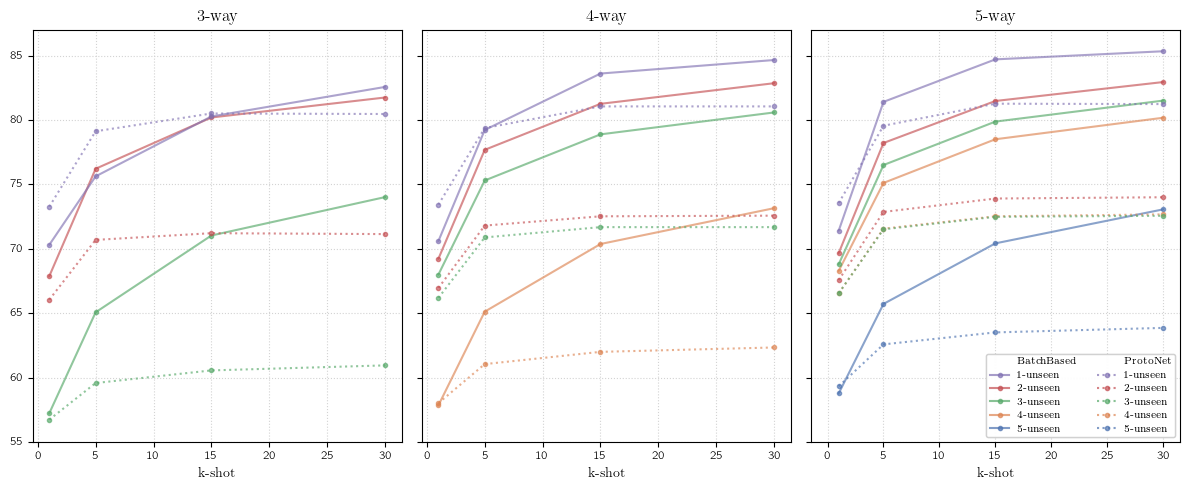

In [4]:
def generate_bb_vs_pn_subplot(df: pd.DataFrame, n_way: int, ax: Axes):

    color1, color2 = color_palette[:2]

    n_unseens = list(reversed(df['n-unseen'].unique().tolist()))
    total_n_unseen = len(n_unseens)
    linestyles = [':', '-.', '-', '--',  (0, (1, 1))]
    bb_handles, bb_labels = [], []
    pn_handles, pn_labels = [], []
    for n_unseen, linestyle, color in zip(n_unseens, linestyles, color_palette):

        n_unseen_df: pd.DataFrame = df[df['n-unseen']  == n_unseen]

        label = f'{n_unseen}-unseen'
        ax_bb = n_unseen_df.plot(
            x='k-shot', y='BatchBased',
            ax=ax,
            linestyle='solid',
            marker='.',
            color=color,
            label=label,
            alpha=0.65
        )
        handles, _ = ax_bb.get_legend_handles_labels()
        bb_handles.append(handles[-1])
        bb_labels.append(label)

        label = f'{n_unseen}-unseen'
        ax_pn = n_unseen_df.plot(x='k-shot', y='ProtoNet',
            ax=ax,
            linestyle='dotted',
            marker='.',
            color=color,
            label=label,
            alpha=0.65
        )
        handles, _ = ax_pn.get_legend_handles_labels()
        pn_handles.append(handles[-1])
        pn_labels.append(label)

        ax.get_legend().remove()

    if n_way != 3:
        ax.set_yticklabels([])

    if n_way == 5:
        dummy, = plt.plot([0], marker='None',
           linestyle='None', label='dummy')
        bb_handles = list(reversed(bb_handles))
        bb_labels = list(reversed(bb_labels))
        pn_handles = list(reversed(pn_handles))
        pn_labels = list(reversed(pn_labels))

        handles = [dummy] + bb_handles + [dummy] + pn_handles
        labels = ['BatchBased'] + bb_labels + ['ProtoNet'] + pn_labels
        legend = plt.legend(handles, labels, loc='lower right', ncol=2)
        plt.gca().add_artist(legend)

    ax.set_title(f'{n_way}-way')
    ax.tick_params(axis='both', which='major', labelsize='small')
    ax.tick_params(axis='both', which='minor', labelsize='small')
    ax.grid()
    ax.set_ylim(55, 87)


def generate_bb_vs_pn_plot(df: pd.DataFrame):
    df = df.copy()

    n_ways = [3, 4, 5]

    plt.rc('legend',fontsize='x-small')
    fig, axs = plt.subplots(1, len(n_ways), figsize=(4*len(n_ways), 5))

    for n_way, ax in zip(n_ways, axs):
        n_way_df = df[[f'BatchBased{n_way}', f'ProtoNet{n_way}']]
        n_way_df = n_way_df.rename(columns={f'BatchBased{n_way}': 'BatchBased',
                                            f'ProtoNet{n_way}': 'ProtoNet'})
        n_way_df['ProtoNet'] = n_way_df['ProtoNet'].str[:5].astype(float)
        n_way_df['BatchBased'] = n_way_df['BatchBased'].str[:5].astype(float)
        n_way_df = n_way_df.reset_index()

        generate_bb_vs_pn_subplot(n_way_df, n_way, ax)

    plt.tight_layout()
    plt.savefig(join(plots_dir, "bb_vs_pn.pdf"))
    plt.show()

generate_bb_vs_pn_plot(method_n_way_df)

#### Comparison k-shot

In [5]:
def generate_k_shot_table(task_complexity_df: pd.DataFrame, method: str):
    df = task_complexity_df.drop(columns=task_complexity_df.columns[7:])
    df = df[df['method'] == method]
    df = df.drop(columns=['method'])


    metrics = {'seen': 'Seen', 'unseen': 'Unseen', 'hm': 'HM'}
    dfs = []
    k_shots = []
    for k_shot, k_shot_df in df.groupby('k-shot'):
        k_shots.append(k_shot)
        cols = {k: f'{v}-{k_shot}' for k, v in metrics.items()}
        k_shot_df = k_shot_df.rename(columns=cols)
        k_shot_df = k_shot_df.drop(columns=['k-shot'])
        k_shot_df = k_shot_df.set_index(['n-way', 'n-unseen'])
        dfs.append(k_shot_df)

    from itertools import product

    df = pd.concat(dfs, axis=1)
    # cols = [
    #     f'{metric}-{k_shot}'
    #     for metric, k_shot in product(metrics.n_wayues(), k_shots)
    # ]
    # df = df[cols]
    return df

def generate_k_shot_table_latex(df: pd.DataFrame):
    df1 = df[df.columns[:6]].reset_index()
    formatters = [format_pm] * df.shape[1]
    path = join(results_dir, 'task_compĺexity', 'k_shot-1-5.tex')
    with open(path, 'w') as f:
        f.write(df1.to_latex(index=False, formatters=formatters, na_rep=' '*12))
    df2 = df[df.columns[6:]].reset_index()
    path = join(results_dir, 'task_compĺexity', 'k_shot-15-30.tex')
    with open(path, 'w') as f:
        f.write(df2.to_latex(index=False, formatters=formatters, na_rep=' '*12))

k_shot_df = generate_k_shot_table(task_complexity_df, 'batchbased')
generate_k_shot_table_latex(k_shot_df)

k_shot_df

Seen-1    Unseen-1        HM-1      Seen-5    Unseen-5  \
n-way n-unseen                                                               
3     1         77.42±0.22  68.15±0.41  70.32±0.31  83.45±0.14  72.41±0.40   
      2         80.26±0.30  60.70±0.20  67.89±0.20  84.18±0.21  70.63±0.17   
      3                NaN  57.25±0.12  57.25±0.12         NaN  65.08±0.11   
4     1         77.29±0.17  67.60±0.36  70.61±0.27  83.41±0.11  76.98±0.29   
      2         79.13±0.17  62.53±0.19  69.24±0.15  84.40±0.10  72.47±0.15   
      3         81.13±0.27  59.78±0.14  68.01±0.15  84.66±0.19  68.43±0.11   
      4                NaN  57.86±0.10  57.86±0.10         NaN  65.13±0.08   
5     1         77.18±0.14  68.65±0.34  71.42±0.24  83.26±0.10  80.46±0.22   
      2         78.15±0.14  63.60±0.18  69.68±0.13  83.66±0.08  73.78±0.13   
      3         79.84±0.16  61.04±0.14  68.81±0.12  84.76±0.09  69.99±0.10   
      4         81.65±0.25  59.72±0.12  68.30±0.13  85.07±0.18  67.76±0.08   
      5                NaN  58.79±0.09  58.79±0.09         NaN  65.73±0.07   

                      HM-5     Seen-15   Unseen-15       HM-15     Seen-30  \
n-way n-unseen                                                               
3     1         75.63±0.29  85.08±0.12  78.60±0.36  80.28±0.26  85.33±0.12   
      2         76.22±0.15  85.48±0.19  76.29±0.15  80.20±0.14  85.83±0.19   
      3         65.08±0.11         NaN  71.04±0.09  71.04±0.09         NaN   
4     1         79.23±0.20  85.29±0.09  82.71±0.21  83.61±0.14  85.60±0.08   
      2         77.69±0.10  86.03±0.09  77.36±0.13  81.26±0.09  86.68±0.09   
      3         75.31±0.11  85.90±0.18  73.44±0.09  78.89±0.10  86.48±0.17   
      4         65.13±0.08         NaN  70.38±0.07  70.38±0.07         NaN   
5     1         81.41±0.15  85.22±0.08  84.56±0.15  84.71±0.10  85.59±0.07   
      2         78.22±0.09  85.44±0.07  78.13±0.11  81.48±0.07  86.21±0.06   
      3         76.51±0.07  86.30±0.08  74.52±0.08  79.88±0.06  87.03±0.08   
      4         75.12±0.09  86.34±0.16  72.39±0.07  78.51±0.08  86.91±0.16   
      5         65.73±0.07         NaN  70.43±0.05  70.43±0.05         NaN   

                 Unseen-30       HM-30  
n-way n-unseen                          
3     1         82.13±0.32  82.57±0.23  
      2         78.70±0.14  81.75±0.13  
      3         74.02±0.08  74.02±0.08  
4     1         84.30±0.18  84.66±0.12  
      2         79.69±0.12  82.86±0.08  
      3         75.90±0.08  80.59±0.10  
      4         73.16±0.06  73.16±0.06  
5     1         85.36±0.13  85.34±0.08  
      2         80.15±0.11  82.95±0.07  
      3         76.80±0.08  81.51±0.06  
      4         74.79±0.06  80.18±0.08  
      5         73.07±0.05  73.07±0.05

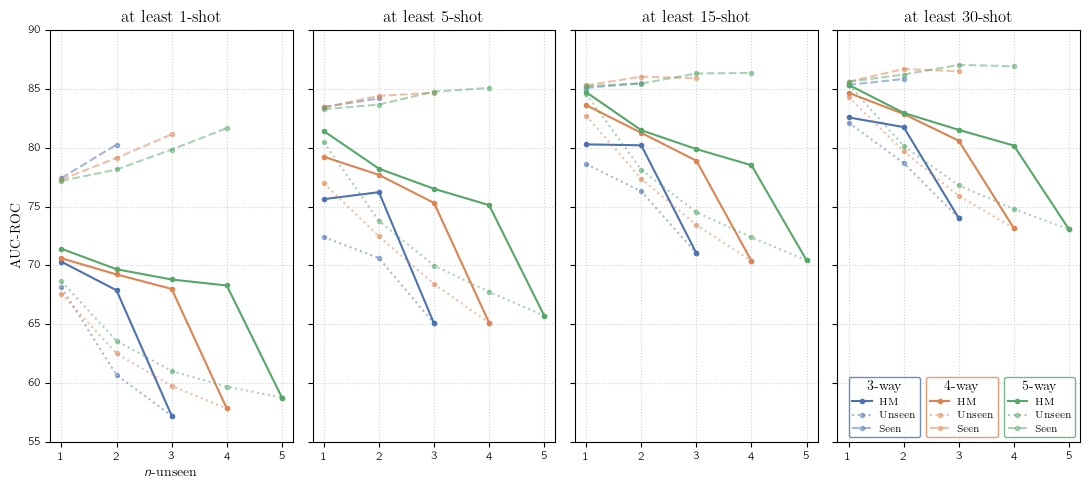

Seen-1  Unseen-1   HM-1  Seen-5  Unseen-5   HM-5  Seen-15  \
n-way n-unseen                                                              
3     1          77.42     68.15  70.32   83.45     72.41  75.63    85.08   
      2          80.26     60.70  67.89   84.18     70.63  76.22    85.48   
      3            NaN     57.25  57.25     NaN     65.08  65.08      NaN   
4     1          77.29     67.60  70.61   83.41     76.98  79.23    85.29   
      2          79.13     62.53  69.24   84.40     72.47  77.69    86.03   
      3          81.13     59.78  68.01   84.66     68.43  75.31    85.90   
      4            NaN     57.86  57.86     NaN     65.13  65.13      NaN   
5     1          77.18     68.65  71.42   83.26     80.46  81.41    85.22   
      2          78.15     63.60  69.68   83.66     73.78  78.22    85.44   
      3          79.84     61.04  68.81   84.76     69.99  76.51    86.30   
      4          81.65     59.72  68.30   85.07     67.76  75.12    86.34   
      5            NaN     58.79  58.79     NaN     65.73  65.73      NaN   

                Unseen-15  HM-15  Seen-30  Unseen-30  HM-30  
n-way n-unseen                                               
3     1             78.60  80.28    85.33      82.13  82.57  
      2             76.29  80.20    85.83      78.70  81.75  
      3             71.04  71.04      NaN      74.02  74.02  
4     1             82.71  83.61    85.60      84.30  84.66  
      2             77.36  81.26    86.68      79.69  82.86  
      3             73.44  78.89    86.48      75.90  80.59  
      4             70.38  70.38      NaN      73.16  73.16  
5     1             84.56  84.71    85.59      85.36  85.34  
      2             78.13  81.48    86.21      80.15  82.95  
      3             74.52  79.88    87.03      76.80  81.51  
      4             72.39  78.51    86.91      74.79  80.18  
      5             70.43  70.43      NaN      73.07  73.07

In [6]:
def generate_plot_k_shot(k_shot_df : pd.DataFrame, k_shot: int, ax: Axes):


    n_ways = (3, 4, 5)
    num_n_ways = len(n_ways)
    colors = color_palette[:num_n_ways]

    for n_way, color in zip(n_ways, colors):
        n_way_df = k_shot_df[k_shot_df['n-way'] == n_way]

        n_way_df.plot(x='n-unseen', y='HM',
                   ax=ax,
                   marker='.', linestyle='solid',
                   color=color)
        n_way_df.plot(x='n-unseen', y='Unseen',
                   ax=ax,
                   marker='.', linestyle='dotted',
                   color=color, alpha=0.5)
        n_way_df.plot(x='n-unseen', y='Seen',
                   ax=ax,
                   marker='.', linestyle='dashed',
                   color=color, alpha=0.5)

        ax.get_legend().remove()


        if k_shot == 1:
            ax.set_xlabel('$n$-unseen')
            ax.set_ylabel('AUC-ROC')
        else:
            ax.set_xlabel('')
            ax.set_yticklabels([])

        if k_shot == 30:
            leg = Legend(ax, ax.get_lines()[-3:],
                        ['HM', 'Unseen', 'Seen'],
                        title=f'{n_way}-way',
                        fontsize='x-small',
                        edgecolor=color,
                        loc='lower right')
            bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
            x_offset = (n_way - 5) * 0.32
            bb.x0 += x_offset
            bb.x1 += x_offset
            leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
            ax.add_artist(leg)

        ax.set_title(f'at least {k_shot}-shot')
        ax.tick_params(axis='both', which='major', labelsize='small')
        ax.tick_params(axis='both', which='minor', labelsize='small')
        ax.grid()
        ax.set_ylim(55, 90)


def generate_plot_by_k_shot(k_shot_df: pd.DataFrame):
    df = k_shot_df.map(lambda v: v[:5] if isinstance(v, str) else v)
    df = df.astype(float, copy=True)

    fig, axs = plt.subplots(1, 4, figsize=(11, 5))

    metrics = ['Seen', 'Unseen', 'HM']
    k_shots = [1, 5, 15, 30]
    for k_shot, ax in zip(k_shots, axs):
        cols = {f'{metric}-{k_shot}': metric for metric in metrics}
        k_shot_df = df[cols.keys()]
        k_shot_df = k_shot_df.rename(columns=cols)
        k_shot_df = k_shot_df.reset_index()
        generate_plot_k_shot(k_shot_df, k_shot, ax)

    plt.tight_layout()
    plt.savefig(join(plots_dir, "k_shot.pdf"))
    plt.show()

    return df

    # fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    # for (k_shot, k_shot_df), ax in zip(df.groupby('k-shot'), axs):
    #     k_shot_df = k_shot_df.drop(columns=['k-shot'])
    #     with open(f'gfsl_{k_shot:02d}-shot.tex', 'w') as f:
    #         formatters = [format_pm] * k_shot_df.shape[1]
    #         f.write(k_shot_df.fillna(' '*12).to_latex(index=False, formatters=formatters))
    #     print(k_shot_df)

    #     k_shot_df['Unseen'] = k_shot_df['Unseen'].str[:5].astype(float)
    #     k_shot_df['Seen'] = k_shot_df['Seen'].str[:5].astype(float)
    #     k_shot_df['HM'] = k_shot_df['HM'].str[:5].astype(float)
    #     generate_plot_k_shot(k_shot_df, k_shot, ax)


    # # fig.suptitle('From Generalized to Standard FSL', fontsize=16)
    # plt.tight_layout()
    # plt.savefig(join(plots_dir, "task_complexity.pdf"))
    # plt.show()

generate_plot_by_k_shot(k_shot_df)

### Subpopulation Shift

In [7]:
def load_age_df():
    df = pd.read_csv(join(results_dir, 'shift_pop', 'exp_mtst.csv'))
    df = df[df.run.str.startswith('age_decade')]
    df['Decade'] = df['run'].str.split('_', expand=True)[1].str[6:].astype(int)
    df['Unseen'] = df['unseen']
    df['Seen'] = df['seen']
    df['HM'] = df['hm']
    df = df[['Decade', 'Seen',  'Unseen', 'HM']]
    return df

age_df = load_age_df()
age_df


,Decade,Seen,Unseen,HM
1,2,82.55±0.12,89.20±0.15,85.48±0.12
2,3,83.56±0.14,88.92±0.20,85.57±0.14
3,4,84.89±0.12,88.81±0.20,86.34±0.13
4,5,84.66±0.12,88.93±0.18,86.31±0.12
5,6,84.75±0.13,85.49±0.23,84.51±0.15
6,7,84.73±0.13,82.53±0.28,82.70±0.19
7,8,84.24±0.16,79.37±0.38,79.77±0.28


Figure(640x480)


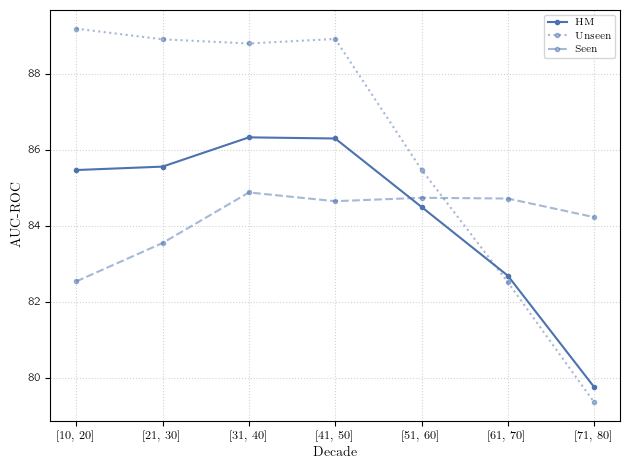

<Figure size 640x480 with 0 Axes>

In [8]:
def generate_age_plot(df: pd.DataFrame):
    df = df.copy()
    df['Unseen'] = df['Unseen'].str[:5].astype(float)
    df['Seen'] = df['Seen'].str[:5].astype(float)
    df['HM'] = df['HM'].str[:5].astype(float)

    fig, ax = plt.subplots()
    ax: Axes = ax
    print(plt.figure())

    df.plot(
        x='Decade', y='HM',
        ax=ax,
        marker='.', linestyle='solid',
        color=color_palette[0]
    )

    df.plot(
        x='Decade', y='Unseen',
        ax=ax,
        marker='.', linestyle='dotted',
        alpha=0.5, color=color_palette[0]
    )

    df.plot(
        x='Decade', y='Seen',
        ax=ax,
        marker='.', linestyle='dashed',
        alpha=0.5, color=color_palette[0]
    )

    labels = ['[10, 20]', '[21, 30]', '[31, 40]', '[41, 50]',
              '[51, 60]', '[61, 70]', '[71, 80]']
    ax.set_xticks(range(2, 9), labels)
    ax.set_xlabel('Decade')
    ax.set_ylabel('AUC-ROC')

    ax.tick_params(axis='both', which='major', labelsize='small')
    ax.tick_params(axis='both', which='minor', labelsize='small')

    ax.grid()
    fig.tight_layout()
    fig.savefig(join(plots_dir, 'subpop_age.pdf'))


generate_age_plot(age_df)

### Resolution

In [9]:
def load_resolution_df():
    df = pd.read_csv(join(results_dir, 'resolution', 'exp_mtst.csv'))
    df[['arch', 'resolution']] = df['run'].str.split('_', expand=True)
    df['Arch'] = df['arch'].astype(str)
    df['Resolution'] = df['resolution'].astype(int)
    df['Unseen'] = df['unseen']
    df['Seen'] = df['seen']
    df['HM'] = df['hm']
    df = df[['Arch', 'Resolution', 'Seen',  'Unseen', 'HM']]
    df = df.replace(arch_name)
    return df

resolution_df = load_resolution_df()
resolution_df

,Arch,Resolution,Seen,Unseen,HM
0,ConvNext-Tiny,224,87.22±0.11,84.50±0.30,84.88±0.21
1,ConvNext-Tiny,384,87.85±0.10,84.58±0.30,85.22±0.21
2,ConvNext-Tiny,512,88.09±0.10,84.44±0.30,85.24±0.21
3,ConvNext-Tiny,768,88.16±0.10,84.53±0.30,85.29±0.22
4,DenseNet-121,224,84.97±0.12,83.27±0.29,83.17±0.21
5,DenseNet-121,384,85.04±0.12,82.97±0.29,83.03±0.20
6,DenseNet-121,512,85.39±0.12,83.37±0.29,83.43±0.20
7,MobileNetV3-Small-0.75,224,84.29±0.13,81.75±0.32,81.87±0.23
8,MobileNetV3-Small-0.75,384,85.73±0.12,82.61±0.32,83.03±0.22
9,MobileNetV3-Small-0.75,512,85.89±0.12,82.53±0.32,83.06±0.22


Figure(640x480)


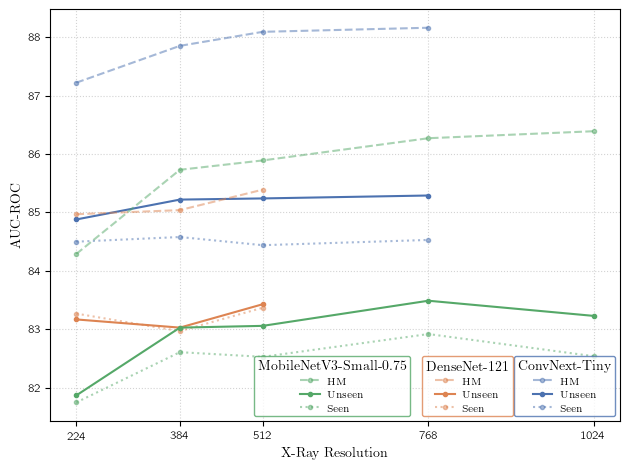

<Figure size 640x480 with 0 Axes>

In [10]:
def generate_resolution_plot(df: pd.DataFrame):
    df = df.copy()
    df['Unseen'] = df['Unseen'].str[:5].astype(float)
    df['Seen'] = df['Seen'].str[:5].astype(float)
    df['HM'] = df['HM'].str[:5].astype(float)

    fig, ax = plt.subplots()
    ax: Axes = ax
    print(plt.figure())

    metrics = {('HM', 1.0, 'solid'), ('Seen', 0.5, 'dashed'), ('Unseen', 0.5, 'dotted')}
    archs = df['Arch'].unique()
    for i, (arch, color) in enumerate(zip(archs, color_palette[:3])):
        arch_df = df[df['Arch'] == arch]
        for metric, alpha, linestyle in metrics:
            ax = arch_df.plot(
                x='Resolution', y=metric,
                ax=ax,
                marker='.', linestyle=linestyle,
                alpha=alpha, color=color,
                # label=f'{metric} {arch}'
            )
            ax.get_legend().remove()

        handles = ax.get_lines()[-3:]
        # TODO: fix this manual sorting
        handles = [handles[1], handles[0], handles[2]]
        labels = ['HM', 'Unseen', 'Seen']
        leg = Legend(ax, handles, labels,
                     title=arch,
                     fontsize='x-small',
                     edgecolor=color,
                     loc='lower right')
        bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
        x_offset = i * 0.18
        bb.x0 -= x_offset
        bb.x1 -= x_offset
        leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
        ax.add_artist(leg)

    # ax.legend(archs)
    ax.set_xticks(df['Resolution'].unique())
    ax.set_xlabel('X-Ray Resolution')
    ax.set_ylabel('AUC-ROC')

    ax.tick_params(axis='both', which='major', labelsize='small')
    ax.tick_params(axis='both', which='minor', labelsize='small')

    ax.grid()
    fig.tight_layout()
    fig.savefig(join(plots_dir, 'resolution.pdf'))


generate_resolution_plot(resolution_df)

### Architectures

In [11]:
def load_arch_df():
    df = pd.read_csv(join(results_dir, 'arch', 'exp_mtst.csv'))
    df['Arch'] = df['run']
    df['Unseen'] = df['unseen']
    df['Seen'] = df['seen']
    df['HM'] = df['hm']
    df = df[['Arch', 'Unseen', 'Seen', 'HM']]
    df = df.set_index('Arch')

    df_params_macs = pd.DataFrame(
        [
            # Efficient
            ('mobilenetv3-small-075',  1.02,  0.12, 'conv'),
            ('mobilenetv3-large-100',  4.20,  0.63, 'conv'),
            # ('mobilevitv2-050',        1.11,  1.05, 'tsfm'),
            ('mobilevitv2-100',        4.39,  4.08, 'tsfm'),
            ('convnext-atto',          3.37,  1.62, 'conv'),
            # Large
            ('densenet121',           6.95,   8.33, 'conv'),
            ('densenet161',           26.47, 22.70, 'conv'),
            ('convnext-tiny',         27.82, 28.60, 'conv'),
            ('mobilevitv2-200',       17.42, 16.11, 'tsfm'),
        ],
        columns=['Arch', 'Params', 'MACs', 'CP']
    ).set_index('Arch')


    df = pd.concat([df_params_macs, df], axis=1, join="inner")
    df = df.reset_index()
    df = df.replace(arch_name)
    df = df[['Arch', 'Seen',  'Unseen', 'HM', 'Params', 'MACs', 'CP']]
    return df


arch_df = load_arch_df()
arch_df

,Arch,Seen,Unseen,HM,Params,MACs,CP
0,MobileNetV3-Small-0.75,85.73±0.12,82.61±0.32,83.03±0.22,1.02,0.12,conv
1,MobileNetV3-Large-1.0,86.75±0.11,84.01±0.30,84.37±0.21,4.20,0.63,conv
2,MobileViTV2-1.0,86.13±0.11,82.47±0.30,83.21±0.21,4.39,4.08,tsfm
3,Convnext-Atto,86.88±0.11,84.47±0.30,84.71±0.21,3.37,1.62,conv
4,DenseNet-121,85.04±0.12,82.97±0.29,83.03±0.20,6.95,8.33,conv
5,DenseNet-161,86.22±0.11,83.46±0.29,83.90±0.20,26.47,22.70,conv
6,ConvNext-Tiny,87.85±0.10,84.58±0.30,85.22±0.21,27.82,28.60,conv
7,MobileViTV2-2.0,87.15±0.11,84.32±0.30,84.75±0.21,17.42,16.11,tsfm


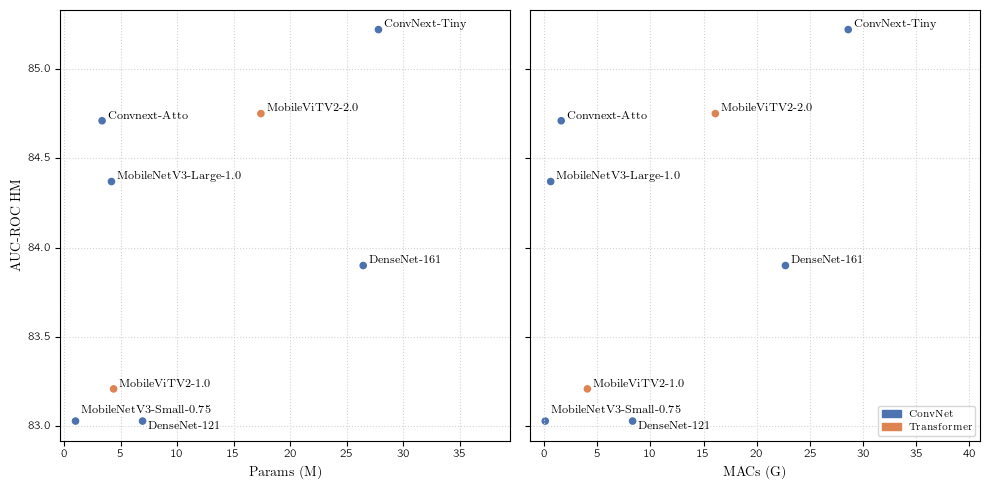

In [12]:
def generate_arch_plot(df: pd.DataFrame):

    df = df.copy()
    df['Unseen'] = df['Unseen'].str[:5].astype(float)
    df['Seen'] = df['Seen'].str[:5].astype(float)
    df['HM'] = df['HM'].str[:5].astype(float)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
    ax0: Axes = ax0
    ax1: Axes = ax1

    cp_color = {'conv': color_palette[0], 'tsfm': color_palette[1]}
    colors = [cp_color[cp] for cp in df['CP']]
    # _color = color[:len(df)]

    df.plot.scatter('Params', 'HM', ax=ax0, c=colors)
    df.plot.scatter('MACs', 'HM', ax=ax1, c=colors)

    for x, y, arch in zip(df['Params'], df['HM'], df['Arch']):
        if arch == 'MobileNetV3-Small-0.75':
            ax0.text(x+0.5, y+0.03, f'{arch}', ha='left', va='bottom', fontsize='small')
        elif arch == 'DenseNet-121':
            ax0.text(x+0.5, y, f'{arch}', ha='left', va='top', fontsize='small')
        else:
            ax0.text(x+0.5, y, f'{arch}', ha='left', va='bottom', fontsize='small')

    xmin, xmax = ax0.get_xlim()
    ax0.set_xlim(xmin, xmax + 0.35 * (xmax - xmin))
    ax0.tick_params(axis='both', which='major', labelsize='small', )

    for x, y, arch in zip(df['MACs'], df['HM'], df['Arch']):
        if arch == 'MobileNetV3-Small-0.75':
            ax1.text(x+0.5, y+0.03, f'{arch}', ha='left', va='bottom', fontsize='small')
        elif arch == 'DenseNet-121':
            ax1.text(x+0.5, y, f'{arch}', ha='left', va='top', fontsize='small')
        else:
            ax1.text(x+0.5, y, f'{arch}', ha='left', va='bottom', fontsize='small')

    xmin, xmax = ax1.get_xlim()
    ax1.set_xlim(xmin, xmax + 0.35 * (xmax - xmin))
    ax1.tick_params(axis='both', which='major', labelsize='small')

    ax0.set_ylabel('AUC-ROC HM')
    ax0.set_xlabel('Params (M)')
    ax1.set_xlabel('MACs (G)')
    ax1.set_yticklabels([])
    ax1.yaxis.label.set_visible(False)

    conv_patch = mpatches.Patch(color=cp_color['conv'], label='ConvNet')
    tsfm_patch = mpatches.Patch(color=cp_color['tsfm'], label='Transformer')
    ax1.legend(handles=[conv_patch, tsfm_patch], loc='lower right')

    # plt.xticks(fontsize='small')
    # plt.yticks(fontsize='small')

    ax0.grid()
    ax1.grid()

    plt.tight_layout()
    plt.savefig(join(plots_dir, "params-macs.pdf"))
    plt.show()

generate_arch_plot(arch_df)